### Importing Libraries

In [3]:
import numpy as np 
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

### Loading data

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)

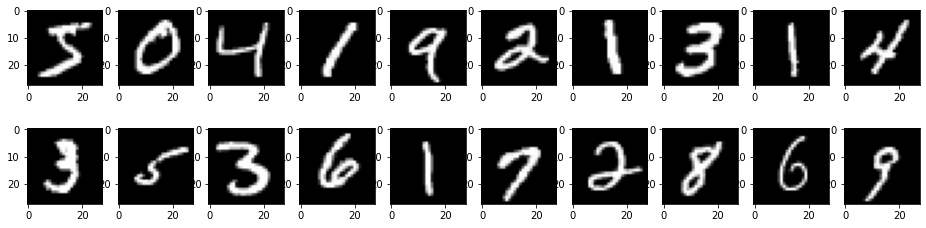

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(16, 4))
count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train[count], cmap='gray')
        count += 1

### Preprocessing dataset

1. Normalizing

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

2. Adding Noise to images

In [6]:
noise_factor = 0.1
X_train_noise = X_train + noise_factor * np.random.normal(loc=0, scale=1, size=X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0, scale=1, size=X_test.shape)

In [8]:
X_train_noise.shape

(60000, 28, 28)

3. Visualize noisy dataset

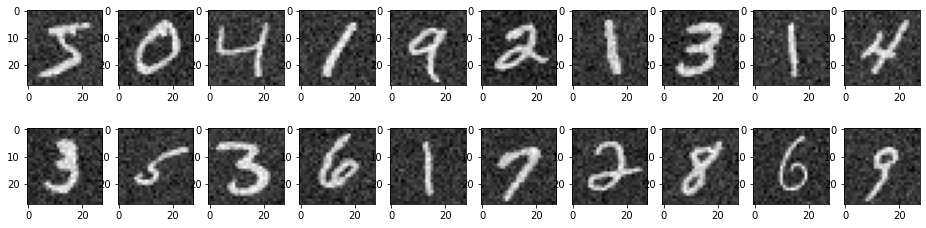

In [9]:
fig, axes = plt.subplots(2, 10, figsize=(16, 4))
count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train_noise[count], cmap='gray')
        count += 1

4. Reshaping dataset

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

print(X_train_noise.shape, X_test_noise.shape)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### Model

In [24]:
#encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

In [25]:
#decoder 
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [26]:
autoencoder = Model(encoder_input, decoded, name = 'DenoisingAEMnist')
autoencoder.summary()

Model: "DenoisingAEMnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 32)  

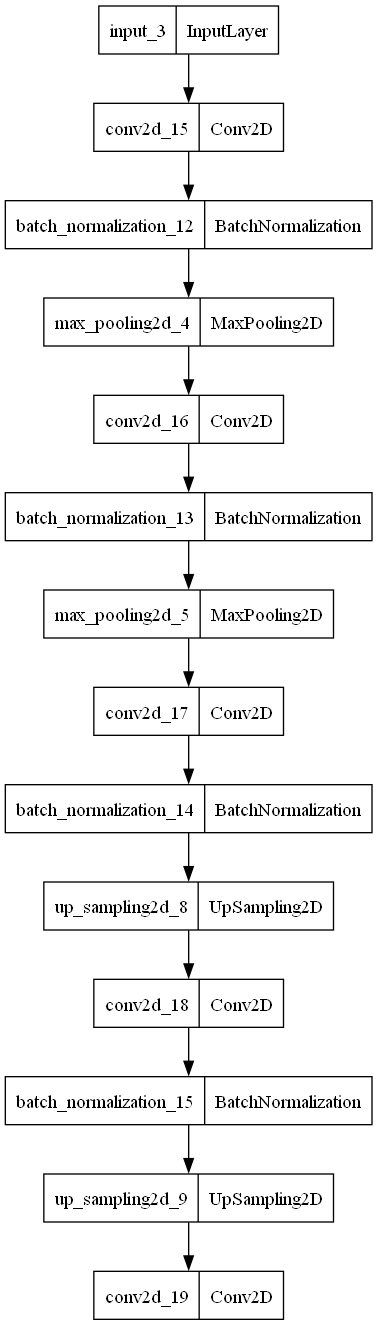

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder)

In [28]:
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer='adam')

In [29]:
callbacks = [ModelCheckpoint('MnistAutoencoder.h5', save_best_only=True, save_weights_only=False, verbose=1)]
history = autoencoder.fit(X_train_noise, X_train, batch_size=128, epochs=50, callbacks=callbacks, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 0.1576
Epoch 1: val_loss improved from inf to 0.10123, saving model to MnistAutoencoder.h5
375/375 [==============================] - 45s 118ms/step - loss: 0.1576 - val_loss: 0.1012
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 0.0764
Epoch 2: val_loss improved from 0.10123 to 0.07848, saving model to MnistAutoencoder.h5
375/375 [==============================] - 53s 141ms/step - loss: 0.0764 - val_loss: 0.0785
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 0.0731
Epoch 3: val_loss improved from 0.07848 to 0.07354, saving model to MnistAutoencoder.h5
375/375 [==============================] - 51s 135ms/step - loss: 0.0731 - val_loss: 0.0735
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 0.0716
Epoch 4: val_loss improved from 0.07354 to 0.07228, saving model to MnistAutoencoder.h5
375/375 [==============================] - 52s 138ms/step - loss: 0.

375/375 [==============================] - 55s 146ms/step - loss: 0.0663 - val_loss: 0.0669
Epoch 35/50
375/375 [==============================] - ETA: 0s - loss: 0.0662
Epoch 35: val_loss improved from 0.06670 to 0.06668, saving model to MnistAutoencoder.h5
375/375 [==============================] - 55s 147ms/step - loss: 0.0662 - val_loss: 0.0667
Epoch 36/50
375/375 [==============================] - ETA: 0s - loss: 0.0662
Epoch 36: val_loss did not improve from 0.06668
375/375 [==============================] - 56s 148ms/step - loss: 0.0662 - val_loss: 0.0670
Epoch 37/50
375/375 [==============================] - ETA: 0s - loss: 0.0662
Epoch 37: val_loss improved from 0.06668 to 0.06667, saving model to MnistAutoencoder.h5
375/375 [==============================] - 56s 148ms/step - loss: 0.0662 - val_loss: 0.0667
Epoch 38/50
375/375 [==============================] - ETA: 0s - loss: 0.0661
Epoch 38: val_loss improved from 0.06667 to 0.06661, saving model to MnistAutoencoder.h5
375/3

In [30]:
autoencoder = load_model('MnistAutoencoder.h5')

In [33]:
def visualize(data, row, col):
    data = data.reshape(data.shape[0], 28, 28)
    count = 0
    fig, axes = plt.subplots(row, col, figsize=(16, 4))
    for i in range(row):
        for j in range(col):
            axes[i, j].imshow(data[count], cmap='gray')
            count += 1

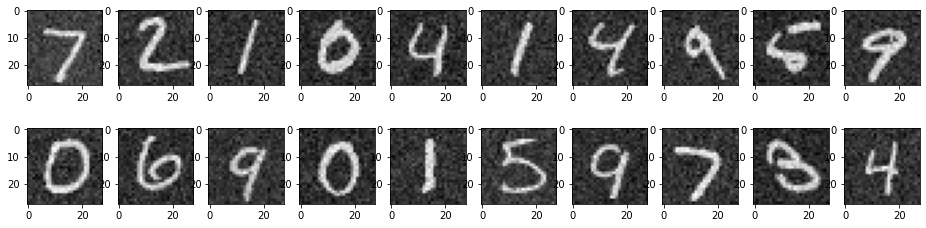

In [35]:
visualize(X_test_noise[:20], 2, 10)

In [38]:
cleaned = autoencoder.predict(X_test_noise[:20])
cleaned.shape

1/1 [==============================] - 0s 134ms/step


(20, 28, 28, 1)

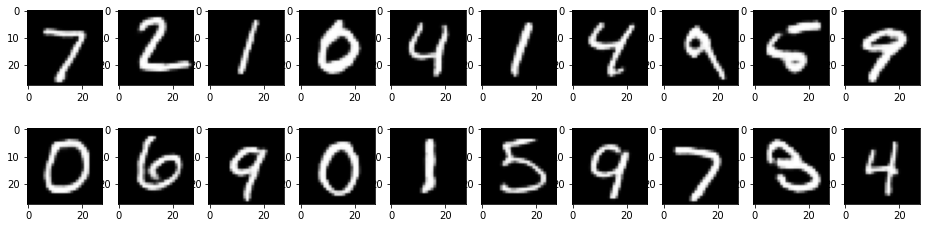

In [39]:
visualize(cleaned, 2, 10)